In [2]:
# install pickle for julia
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Distributions")
Pkg.add("Plots")

    Updating registry at `C:\Users\dhananjay.c\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed Libtiff_jll ─ v4.3.0+1
   Installed LERC_jll ──── v3.0.0+1
  No Changes to `C:\Users\dhananjay.c\.julia\environments\v1.6\Project.toml`
    Updating `C:\Users\dhananjay.c\.julia\environments\v1.6\Manifest.toml`
  [88015f11] + LERC_jll v3.0.0+1
  [89763e89] ↑ Libtiff_jll v4.3.0+0 ⇒ v4.3.0+1
Precompiling project...
  ✓ LERC_jll
  ✓ Libtiff_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  5 dependencies successfully precompiled in 57 seconds (155 already precompiled)
   Resolving package versions...
  No Changes to `C:\Users\dhananjay.c\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\dhananjay.c\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\dhananjay.c\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\dhananjay.c\.julia\environments

In [14]:
# Load require packages
using DataFrames
using CSV
using Random, Distributions
Random.seed!(123)
using Plots

In [15]:
# read data from CSV
data = CSV.read("data.csv", DataFrame);
X = data[!,["Feature_1","Feature_2"]];
Y = data[!,"Y"];

In [16]:
# Define constants
total_epoch = 15
learning_rate = 0.001

0.001

In [17]:
function sigmoid_(z)
    #In this function, we will compute the sigmoid(z)
    return 1/(1+exp(-z))
end   

function tanh_(z)
    # In this function, we will compute the tanh(z) 
    exPos = exp(z)
    expNeg = exp(-z)                 
    return (exPos-expNeg)/(exPos+expNeg)
end

function forward_propagation(x, y, w)
    # In this we will perform forward propagation
    o1 = w[1]*x[1]
    o2 = w[2]*x[2]
    o3 = sigmoid_(o1)
    o4 = sigmoid_(o2)
    o5 = o3*w[3]
    o6 = tanh_(o5)
    y_dash = o4+o6
    loss = (y - y_dash)^2
    dl = 2*(y - y_dash) * -1
    return Dict("loss" => loss, "dl" => dl,"y_dash" => y_dash)
end

function backward_propagation(x,w,dict)
    # In this function we will perform backword propagation
    # example: We have totol 3 W's so we will calculate 3 derivatives
    # dw1 = # n diw1 compute derivative of L w.r.to w1
    # dw3 = # n diw2 compute derivative of L w.r.to w2
    # dw3 = # n diw3 compute derivative of L w.r.to w3
    o1 = w[1]*x[1]
    o2 = w[2]*x[2]
    o3 = sigmoid_(o1)
    o4 = sigmoid_(o2)
    o5 = o3*w[3]
    
    dw3 = dict["dl"] * 1 * (1 - tanh_(o5)^2) * o3
    dw2 = dict["dl"] * 1 * (sigmoid_(o2) - (1-sigmoid_(o2))) * x[2]
    dw1 = dw3 *  (sigmoid_(o1) - (1-sigmoid_(o1))) * x[1]
    return Dict("dw1" => dw1, "dw2" => dw2, "dw3" => dw3)
end   

function calculate_loss(x, y, w)
    # In this function we will calculate loss after weight updation
    o1 = w[1]*x[1]
    o2 = w[2]*x[2]
    o3 = sigmoid_(o1)
    o4 = sigmoid_(o2)
    o5 = o3*w[3]
    o6 = tanh_(o5)
    y_dash = o4+o6
    loss = (y - y_dash)^2
    return loss
end    

calculate_loss (generic function with 1 method)

### Vanilla update of weights

In [18]:
mse_per_epoch_vanilla=[]
W = rand(Normal(0.0,0.01),3);
for epoch in range(1, stop=total_epoch)
    
    for i in range(1, stop=size(X)[1])
        forward=forward_propagation(Matrix(X[i:i,:]),Y[i], W)
        backword = backward_propagation(Matrix(X[i:i,:]),W,forward)
        dw = [k for k in values(backword)]
        W = W-learning_rate*dw
    end
    loss=[]
    for i in range(1, stop=size(X)[1])
        cal_loss = calculate_loss(Matrix(X[i:i,:]),Y[i], W)
        append!(loss, cal_loss)
    end 

    append!(mse_per_epoch_vanilla, mean(loss))
end    

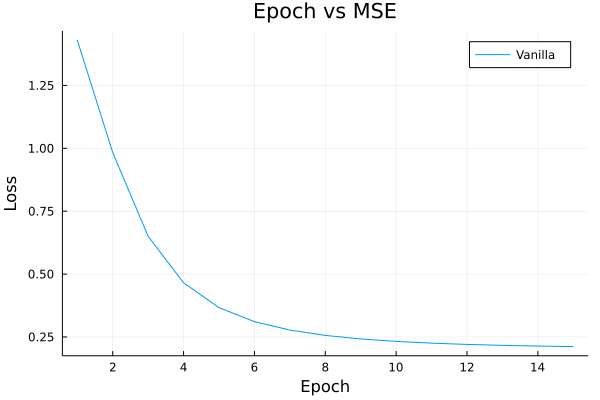

In [19]:
plot(range(1, stop=total_epoch), mse_per_epoch_vanilla,title = "Epoch vs MSE", label = "Vanilla ")
xlabel!("Epoch")
ylabel!("Loss")

### Momentum update of weights

In [20]:
mse_per_epoch_momentum=[]
W = rand(Normal(0.0,0.01),3)
v=0
mu=0.5
for epoch in range(1, stop=total_epoch)
    
    for i in range(1, stop=size(X)[1])
        forward=forward_propagation(Matrix(X[i:i,:]),Y[i], W)
        backword = backward_propagation(Matrix(X[i:i,:]),W,forward)
        dw = [k for k in values(backword)]
        v = (mu*v) .- learning_rate*dw # for momentum update
        W = W + v
    end
    loss=[]
    for i in range(1, stop=size(X)[1])
        cal_loss = calculate_loss(Matrix(X[i:i,:]),Y[i], W)
        append!(loss, cal_loss)
    end 

    append!(mse_per_epoch_momentum, mean(loss))
end  

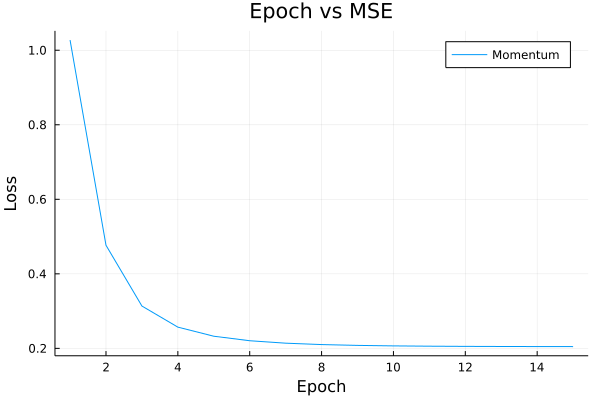

In [21]:
plot(range(1, stop=total_epoch), mse_per_epoch_momentum,title = "Epoch vs MSE", label = "Momentum")
xlabel!("Epoch")
ylabel!("Loss")

### Plot both together

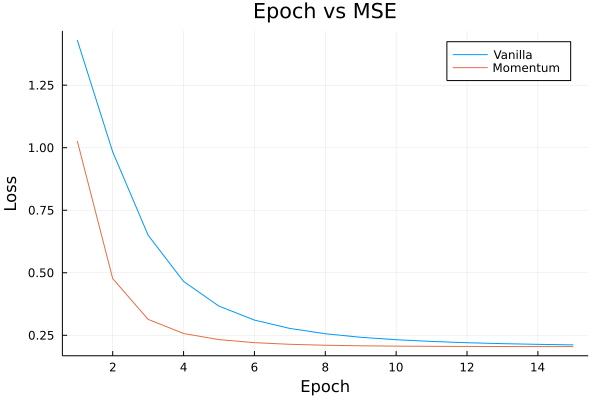

In [29]:
plot(range(1, stop=total_epoch), [mse_per_epoch_vanilla,mse_per_epoch_momentum],title = "Epoch vs MSE", label = ["Vanilla" "Momentum"])
xlabel!("Epoch")
ylabel!("Loss")